In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
data.shape

(4653, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
data.duplicated().sum()

1889

In [7]:
data=data.drop_duplicates()

In [8]:
data.shape

(2764, 9)

In [9]:
data['Education'].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

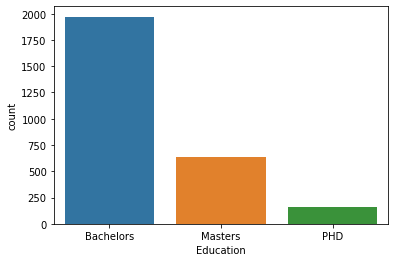

In [10]:
sns.countplot(data=data,x='Education')
plt.show()

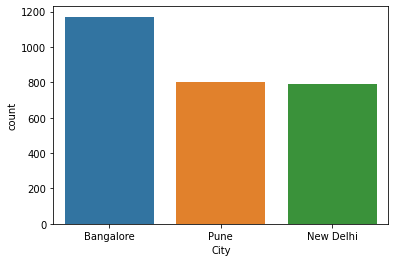

In [11]:
sns.countplot(data=data,x='City')
plt.show()

In [12]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
data.std().mean()

C:\Users\power\AppData\Local\Temp\ipykernel_8628\340169037.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std().mean()


1.9436140503483674

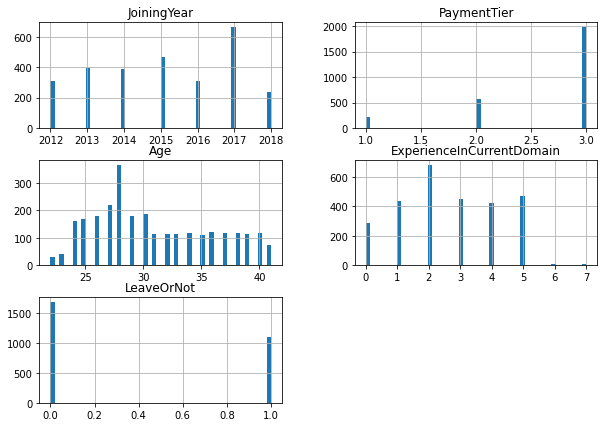

In [14]:
data.hist(bins=50,figsize=(10,7))
plt.show()

In [15]:
data['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

C:\Users\power\AppData\Local\Temp\ipykernel_8628\2756386175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr()


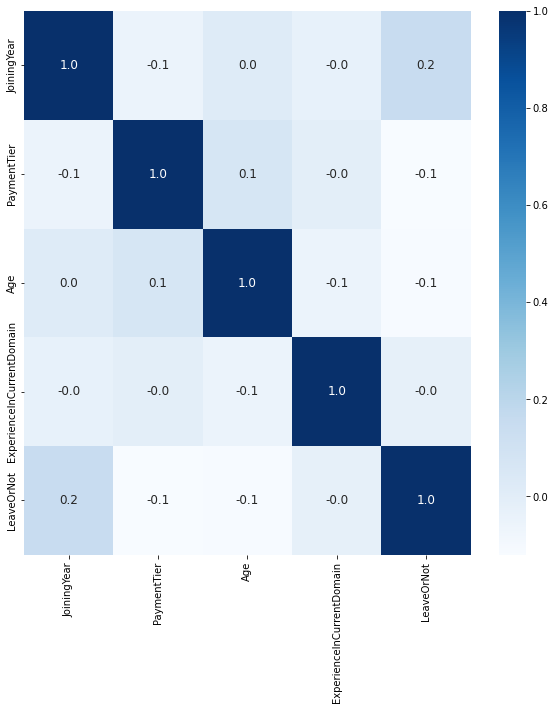

In [16]:
corr_matrix=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cbar=True,fmt='.1f',annot=True,annot_kws={'size':12},cmap='Blues')
plt.show()

In [17]:
data['Gender']=data['Gender'].replace('Female',0)
data['Gender']=data['Gender'].replace('Male',1)

In [18]:
data['EverBenched']=data['EverBenched'].replace('No',0)
data['EverBenched']=data['EverBenched'].replace('Yes',1)

In [19]:
data_city=pd.get_dummies(data['City'],drop_first=True)

In [20]:
data_city.head()

,New Delhi,Pune
0,0,0
1,0,1
2,1,0
3,0,0
4,0,1


In [21]:
data=data.drop('City',axis=1)
data=pd.concat([data,data_city],axis=1)
data.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,New Delhi,Pune
0,Bachelors,2017,3,34,1,0,0,0,0,0
1,Bachelors,2013,1,28,0,0,3,1,0,1
2,Bachelors,2014,3,38,0,0,2,0,1,0
3,Masters,2016,3,27,1,0,5,1,0,0
4,Masters,2017,3,24,1,1,2,1,0,1


In [22]:
ord_cols_mapping=[{'col':'Education','mapping':{'Bachelors':1,'Masters':2,'PHD':3},}]
encoder=OrdinalEncoder(mapping=ord_cols_mapping)
data=encoder.fit_transform(data)
data.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,New Delhi,Pune
0,1,2017,3,34,1,0,0,0,0,0
1,1,2013,1,28,0,0,3,1,0,1
2,1,2014,3,38,0,0,2,0,1,0
3,2,2016,3,27,1,0,5,1,0,0
4,2,2017,3,24,1,1,2,1,0,1


In [23]:
X=data.drop('LeaveOrNot',axis=1)
y=data['LeaveOrNot']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
dt=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=8)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8)

In [26]:
preds=dt.predict(X_test)

In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82       333
           1       0.85      0.44      0.58       220

    accuracy                           0.75       553
   macro avg       0.79      0.69      0.70       553
weighted avg       0.77      0.75      0.72       553



In [28]:
confusion_matrix(y_test,preds)

array([[316,  17],
       [123,  97]], dtype=int64)

In [29]:
dt1=DecisionTreeClassifier()
param_grid={'max_depth':[2,3,4,5,6,7,8],'max_leaf_nodes':[5,6,7,8,9,10,11,12],'min_samples_split':[1,2,3,4,5]}
grid=GridSearchCV(estimator=dt1,param_grid=param_grid)
grid.fit(X_train,y_train)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [30]:
grid.best_params_

{'max_depth': 6, 'max_leaf_nodes': 12, 'min_samples_split': 2}

In [31]:
new_preds=grid.predict(X_test)
print(classification_report(y_test,new_preds))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       333
           1       0.79      0.54      0.64       220

    accuracy                           0.76       553
   macro avg       0.77      0.72      0.73       553
weighted avg       0.77      0.76      0.75       553



In [32]:
confusion_matrix(y_test,new_preds)

array([[302,  31],
       [101, 119]], dtype=int64)